In [15]:
#extract or data from the zip file
import zipfile
archive = zipfile.ZipFile("Data_set.zip")
archive.extractall("sample_data")

#with zipfile.ZipFile("final_antispoofing.zip","r") as zip_ref:
#    zip_ref.extractall("sample_data")





In [7]:
from IPython import display
print("original Vs New_dataset structure")
display.Image("original vs new_dataset.png")


original Vs New_dataset structure


In [16]:
# data tranfer
dataset_dir = "sample_data/final_antispoofing"
test_dataset_dir = "sample_data/final_antispoofing/test"
train_dataset_dir = "sample_data/final_antispoofing/train"

In [72]:
# creating directory
import os
os.mkdir("antispoofing_dataset")
os.mkdir("antispoofing_dataset/test")

os.mkdir("antispoofing_dataset/train")
os.mkdir("antispoofing_dataset/train/real")
os.mkdir("antispoofing_dataset/train/spoof")
os.mkdir("antispoofing_dataset/test/real")
os.mkdir("antispoofing_dataset/test/spoof")

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'antispoofing_dataset'

In [9]:
dataset_dir = "sample_data/final_antispoofing"
test_dir = "antispoofing_dataset/test"
train_dir = "antispoofing_dataset/train"

In [31]:
# data separation
import shutil
import numpy as np
import matplotlib.pyplot as plt
import cv2

def train_test_split(data_doct):
    for i_split in os.listdir(data_doct):
        path_i_split = os.path.join(data_doct, i_split)
        for cat in os.listdir(path_i_split):
            path_cat = os.path.join(path_i_split, cat)
            for sub in os.listdir(path_cat):
                path_sub = os.path.join(path_cat, sub)
                for img in os.listdir(path_sub):
                    if i_split == 'train':
                        shutil.copy(os.path.join(path_sub, img), os.path.join(train_dir, cat, img))
                    else:
                        shutil.copy(os.path.join(path_sub, img), os.path.join(test_dir, cat, img))
                    
                        
train_test_split(data_doct=dataset_dir)



In [25]:
# Data exploration
print("....exploring data....")
categories = ["real", "spoof"]
    
for cat in categories:
    path = os.path.join(train_dir, cat)
    if cat == "real":
        real_1 = len(os.listdir(path))
    else:
        spoof_1 = len(os.listdir(path))
        
    print(f"there are {len(os.listdir(path))} in {cat} directory ")
    
print(f"there are {(real_1+spoof_1)} in training directory ")
        
        
print("....exploring datab...")
        
for cat in categories:
    path = os.path.join(test_dir, cat)
    if cat == "real":
        real_2 = len(os.listdir(path))
    else:
        spoof_2 = len(os.listdir(path))
        
    print(f"there are {len(os.listdir(path))} in {cat} directory ")
    
print(f"there are {(real_2+spoof_2)} in training directory ")

        

....exploring data....
there are 2102 in real directory 
there are 2118 in spoof directory 
there are 4220 in training directory 
....exploring datab...
there are 477 in real directory 
there are 474 in spoof directory 
there are 951 in training directory 


In [26]:
# Data Visualization
# Getting data
def get_data (data, no_data_samples):
    data_plate = []
    for cat in categories:
        path = os.path.join(data, cat)
        imgs =os.listdir(path)
        i = 1
        for img in imgs:
            if i > no_data_samples:
              break
            else:
                data_plate.append(os.path.join(path, img))   
                i += 1
    return(data_plate)
            
            
            

In [38]:
# Visualizing data
def data_visual (data_plate, rows, columns):
    figs = plt.figure(figsize =(20,20))
    for i in range(1, rows*columns+1):
        figs.add_subplot(rows, columns, i)
        img_array = cv2.imread(data_plate[i-1])
        figs.subplots_adjust(hspace=0)
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2GRAY))
        plt.xlabel(data_plate[i-1].split('/')[-2])
    plt.show()

In [29]:

testing_image = get_data(test_dir, 25)
print(testing_image)
print(len(testing_image))

['antispoofing_dataset/test\\real\\20201110_113245.jpg', 'antispoofing_dataset/test\\real\\20201110_113259.jpg', 'antispoofing_dataset/test\\real\\20201110_113320hr_flip.jpg', 'antispoofing_dataset/test\\real\\20201110_113342.jpg', 'antispoofing_dataset/test\\real\\20201110_113455hr_flip.jpg', 'antispoofing_dataset/test\\real\\20201110_113509.jpg', 'antispoofing_dataset/test\\real\\20201110_113513hr_flip.jpg', 'antispoofing_dataset/test\\real\\20201110_113518.jpg', 'antispoofing_dataset/test\\real\\20201110_113524.jpg', 'antispoofing_dataset/test\\real\\20201110_113526hr_flip.jpg', 'antispoofing_dataset/test\\real\\20201110_113533hr_flip.jpg', 'antispoofing_dataset/test\\real\\20201110_113540.jpg', 'antispoofing_dataset/test\\real\\20201110_144657.jpg', 'antispoofing_dataset/test\\real\\20201110_144700.jpg', 'antispoofing_dataset/test\\real\\20201110_144704.jpg', 'antispoofing_dataset/test\\real\\20201110_144725(0)hr_flip.jpg', 'antispoofing_dataset/test\\real\\20201110_144728hr_flip.j

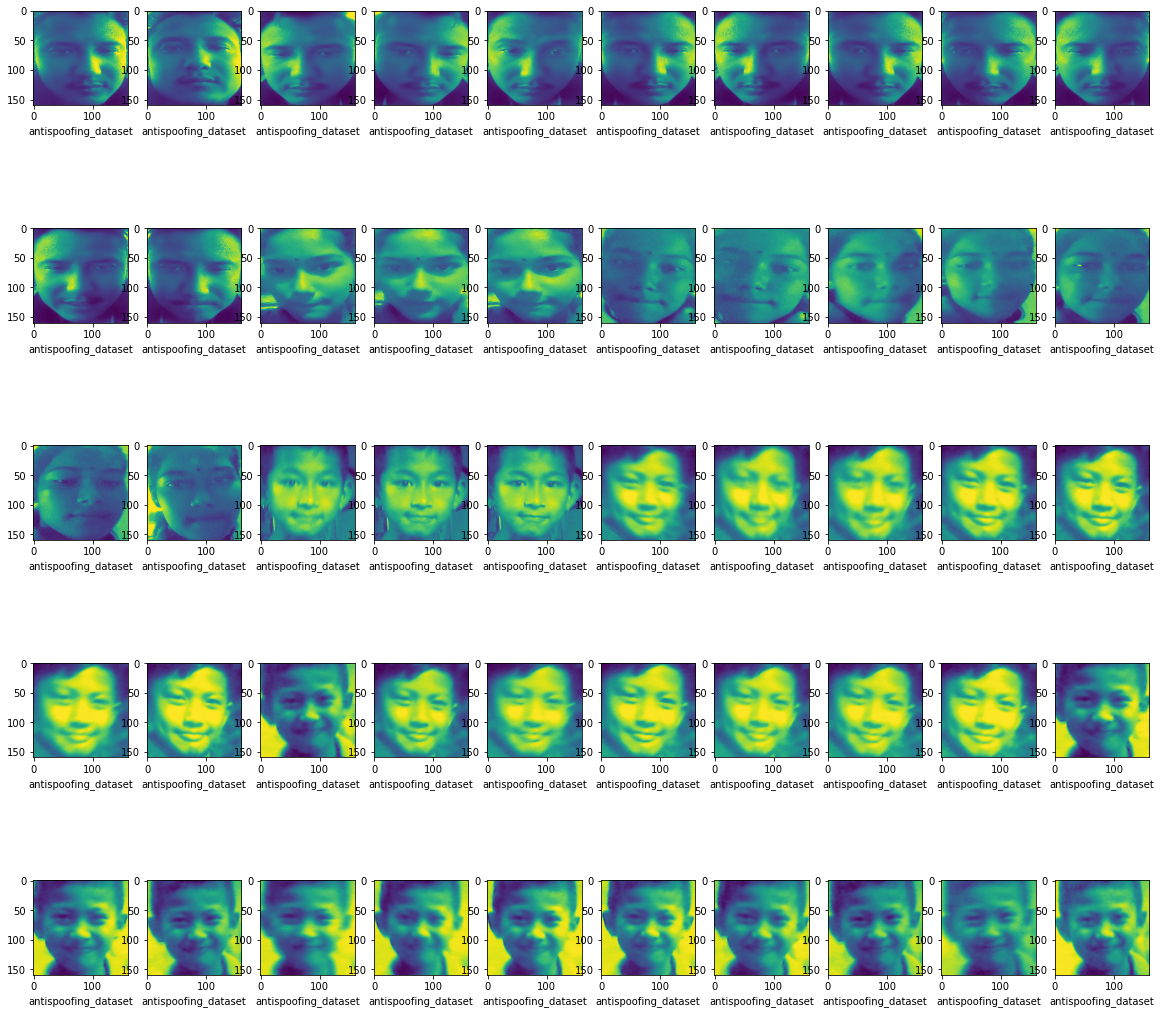

In [39]:
 
data_visual(testing_image,5,10)

In [113]:
testing_image = get_data(train_dir, 25)
print(testing_image)
print(len(testing_image))

['antispoofing_dataset/train\\real\\20201110_113249.jpg', 'antispoofing_dataset/train\\real\\20201110_113251.jpg', 'antispoofing_dataset/train\\real\\20201110_113253.jpg', 'antispoofing_dataset/train\\real\\20201110_113254.jpg', 'antispoofing_dataset/train\\real\\20201110_113259hr_flip.jpg', 'antispoofing_dataset/train\\real\\20201110_113317hr_flip.jpg', 'antispoofing_dataset/train\\real\\20201110_113324hr_flip.jpg', 'antispoofing_dataset/train\\real\\20201110_113327hr_flip.jpg', 'antispoofing_dataset/train\\real\\20201110_113330hr_flip.jpg', 'antispoofing_dataset/train\\real\\20201110_113334.jpg', 'antispoofing_dataset/train\\real\\20201110_113337.jpg', 'antispoofing_dataset/train\\real\\20201110_113350.jpg', 'antispoofing_dataset/train\\real\\20201110_113353.jpg', 'antispoofing_dataset/train\\real\\20201110_113404.jpg', 'antispoofing_dataset/train\\real\\20201110_113404hr_flip.jpg', 'antispoofing_dataset/train\\real\\20201110_113407hr_flip.jpg', 'antispoofing_dataset/train\\real\\202

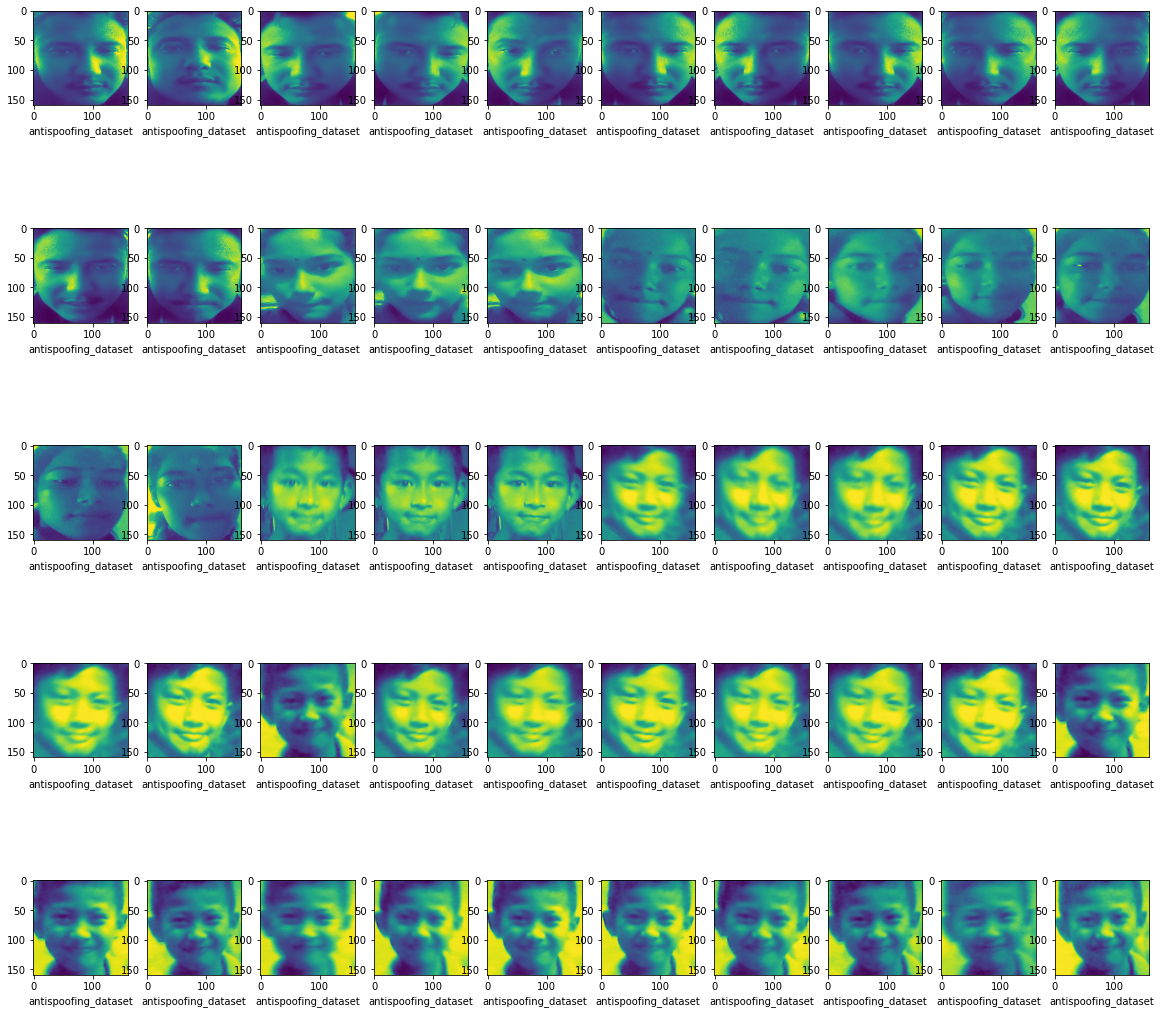

In [40]:
data_visual(testing_image,5,10)

In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Input, Flatten
from keras.models import Model
#from keras.optimizers import adam_v2
#from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
#from keras.callbacks import Modelcheckpoint
#from keras.models import model_from_jason
from keras import distribute
import json

In [6]:
train_dataset = ImageDataGenerator(brightness_range=(0.8, 1.2),rotation_range =30,width_shift_range= 0.2, height_shift_range = 0.2, fill_mode = "nearest", shear_range = 0.2, zoom_range = 0.3, rescale = 1./255)
Valid_dataset = ImageDataGenerator(rescale= 1./255)

In [13]:
train_generator = train_dataset.flow_from_directory(train_dir, target_size=(160,160), color_mode="rgb",
                                                    class_mode = "binary", batch_size = 25, shuffle = "TRUE")

Found 4220 images belonging to 2 classes.


In [14]:
valid_generator = Valid_dataset.flow_from_directory(test_dir, target_size=(160,160), color_mode="rgb",
                                                    class_mode = "binary", batch_size = 25, shuffle = "TRUE")

Found 951 images belonging to 2 classes.


In [10]:
#model selection
mobilenet = MobileNetV2(weights= "imagenet", include_top = False, input_tensor=Input(shape=(160,160,3)))

In [11]:
mobilenet.trainable = False

In [12]:
output = Flatten()(mobilenet.output)
output = Dropout(0.3)(output)
output = Dense(units = 8, activation = "relu")(output)
prediction = Dense(1, activation= "sigmoid")(output)

In [13]:
model = Model(inputs= mobilenet.input, outputs = prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][0]']           

In [44]:
#compiling the model
model.compile(
    loss = "binary_crossentropy", 
    optimizer = Adam(   
    learning_rate= 0.000001,
    beta_1 = 0.9,
    beta_2 = 0.999,
    epsilon = 1e-07
),
    metrics= ["accuracy"]
 )


NameError: name 'Adam' is not defined